<a href="https://colab.research.google.com/github/andres-merino/AprendizajeAutomaticoInicial-05-N0105/blob/main/2-Ejercicios/05-kNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Escuela de Ciencias Físicas y Matemática</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Algoritmo k-Nearest Neighbors
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Andrés Merino &bull; 2025-04
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>

A lo largo de este taller, aplicaremos el algoritmo de clasificación k-Nearest Neighbors (kNN) para predecir la clase de un conjunto de datos y también para predecir valores numéricos.

Los paquetes necesarios son:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np
from sklearn.model_selection import train_test_split # División de datos
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, r2_score, mean_squared_error, mean_absolute_error  # Métrica de evaluación
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor # Modelo


---
## <font color='264CC7'> Clasificación </font>


### <font color='264CC7'> Preprocesamiento de datos </font>

Primero necesitas el conjunto de datos. Los datos a utilzar son los seleccionados en la clase aterior.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Carga el conjunto de datos y procésalos:
<ul>
  <li>Muestra algunos datos.</li>
  <li>Muestra una descripción de los datos.</li>
  <li>Escala los datos si es necesario.</li>
</ul>
</div>

### Carga de Datos

In [2]:
# Cargar el archivo
df = pd.read_csv("https://raw.githubusercontent.com/niconlvs/ModelosML/refs/heads/main/transacciones.csv")
df.head()

,TransactionAmount,TransactionType,Location,DeviceID,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionHour,TransactionWeekday,TransactionDay,TransactionMonth,PreviousTransactionDate
0,14.09,Debit,San Diego,D000380,M015,ATM,70,Doctor,81,1,5112.21,16,1,11,4,2024-11-04 08:08:08
1,376.24,Debit,Houston,D000051,M052,ATM,68,Doctor,141,1,13758.91,16,1,27,6,2024-11-04 08:09:35
2,126.29,Debit,Mesa,D000235,M009,Online,19,Student,56,1,1122.35,18,0,10,7,2024-11-04 08:07:04
3,184.50,Debit,Raleigh,D000187,M002,Online,26,Student,25,1,8569.06,16,4,5,5,2024-11-04 08:09:06
4,13.45,Credit,Atlanta,D000308,M091,Online,26,Student,198,1,7429.40,17,0,16,10,2024-11-04 08:06:39


### Descripción de los datos

In [3]:
print("🔹 Dimensión del DataFrame:", df.shape)

print("\n🔹 Valores Nulos por Columna:\n")
display(df.isnull().sum())

print("\n🔹 Estadísticos Descriptivos:\n")
display(df.describe())

🔹 Dimensión del DataFrame: (2512, 16)

🔹 Valores Nulos por Columna:



,0
TransactionAmount,0
TransactionType,0
Location,0
DeviceID,0
MerchantID,0
Channel,0
CustomerAge,0
CustomerOccupation,0
TransactionDuration,0
LoginAttempts,0



🔹 Estadísticos Descriptivos:



,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionHour,TransactionWeekday,TransactionDay,TransactionMonth
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.00000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966,16.626194,1.448248,15.827229,6.56250
std,291.946243,17.792198,69.963757,0.602662,3900.942499,0.731059,1.511310,8.761293,3.47559
min,0.260000,18.000000,10.000000,1.000000,101.250000,16.000000,0.000000,1.000000,1.00000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000,16.000000,0.000000,8.000000,3.00000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000,16.000000,1.000000,16.000000,7.00000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000,17.000000,3.000000,24.000000,10.00000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000,18.000000,4.000000,31.000000,12.00000


In [4]:
# Definir las columnas a usar
numeric_cols = [
    'TransactionAmount',
    'CustomerAge',
    'LoginAttempts',
    'AccountBalance',
    ]

cat_cols = [
    'TransactionType',
    'Channel'
    ]

### Gráficos

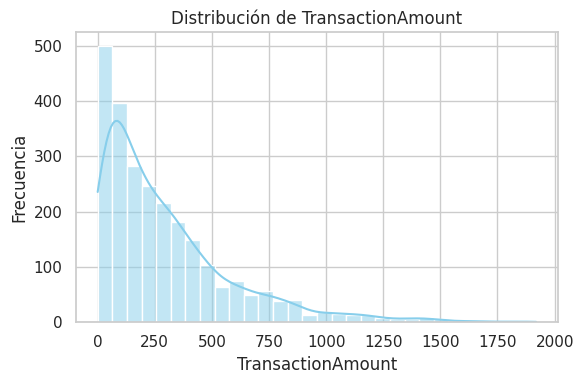

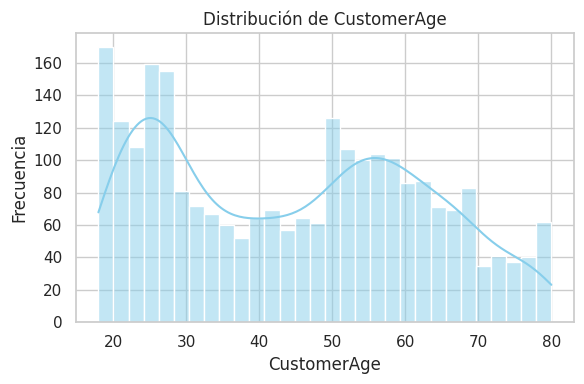

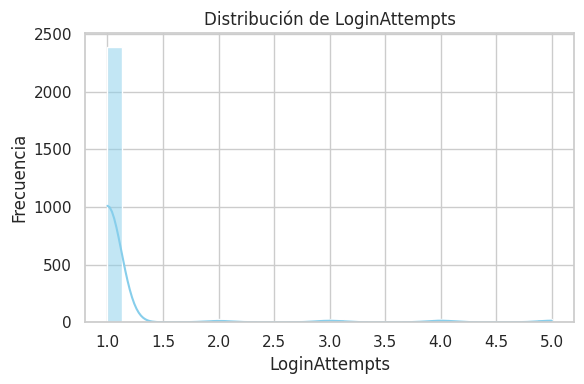

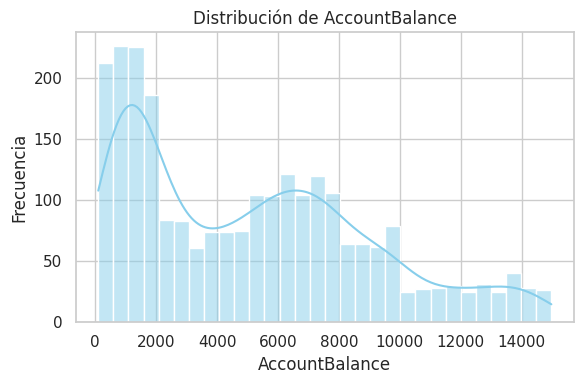

In [5]:
# Estilo bonito para los gráficos
sns.set(style="whitegrid")

# Crear un histograma para cada columna numérica
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.tight_layout()
    plt.show()

<ipython-input-6-5c6cfc839a8d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel', edgecolor='black')
<ipython-input-6-5c6cfc839a8d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel', edgecolor='black')


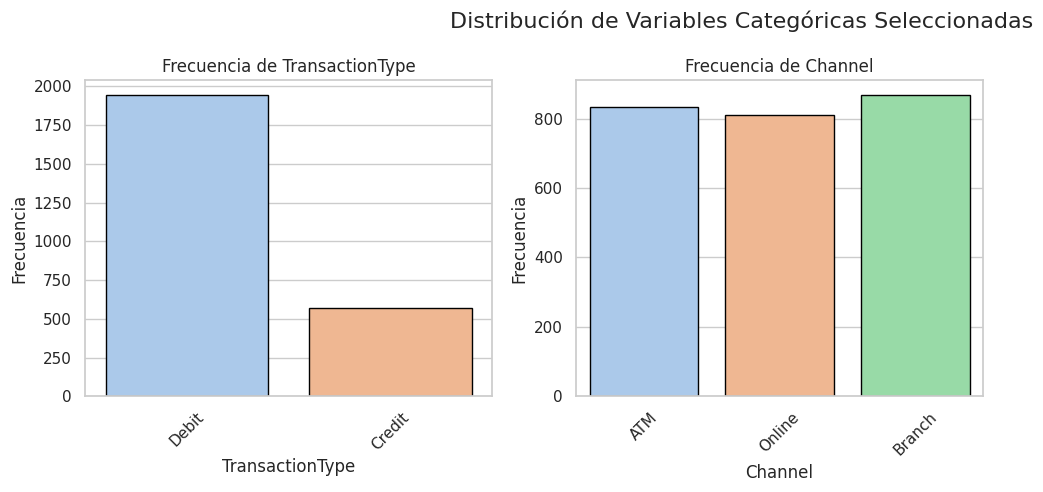

In [6]:
# Crear subplots
plt.figure(figsize=(15, 5))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(1, 3, i)
    sns.countplot(data=df, x=col, palette='pastel', edgecolor='black')
    plt.title(f"Frecuencia de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.xticks(rotation=45)

plt.suptitle("Distribución de Variables Categóricas Seleccionadas", fontsize=16)
plt.tight_layout()
plt.show()

### Escalar Datos

In [7]:
# Escalar columnas numéricas
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(df[numeric_cols])

# Codificar variables categóricas
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

X_cat_encoded = encoder.fit_transform(df[cat_cols])

# Crear nombres de columnas codificadas
encoded_cat_names = encoder.get_feature_names_out(cat_cols)
df_cat_encoded = pd.DataFrame(X_cat_encoded, columns=encoded_cat_names, index=df.index)

# Combinar numéricas escaladas + categóricas codificadas
X_final = np.hstack([X_num_scaled, X_cat_encoded])

# DataFrame final para explorar visualmente
df_cluster_ready = pd.DataFrame(X_final, columns=[*numeric_cols, *encoded_cat_names])


### <font color='264CC7'> Determinación del valor de k </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Determina el número óptimo de k para el algoritmo kNN:
<ul>
  <li>Genera una gráfica que muestre el valor de k vs la precisión del modelo.</li>
  <li>Selecciona el valor de k que maximice la precisión.</li>
</ul>
</div>


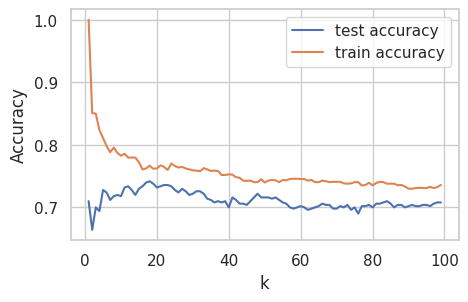

In [8]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df_cluster_ready, df['CustomerOccupation'], test_size=0.2, random_state=42, stratify=df['CustomerOccupation'])

# Determinar el mejor valor de k
k_values = range(1, 100)

# Precisión de los modelos
precisions_test = []
precisions_train = []

for k in k_values:
    modelo = KNeighborsClassifier(n_neighbors=k)
    modelo.fit(X_train, y_train)
    y_pred_test = modelo.predict(X_test)
    y_pred_train = modelo.predict(X_train)
    precisions_test.append(accuracy_score(y_test, y_pred_test))
    precisions_train.append(accuracy_score(y_train, y_pred_train))

# Visualizar la precisión en función de k
plt.figure(figsize=(5, 3))
plt.plot(k_values, precisions_test, label="test accuracy")
plt.plot(k_values, precisions_train, label="train accuracy")
plt.ylabel("Accuracy")
plt.xlabel("k")
plt.legend()
plt.show()

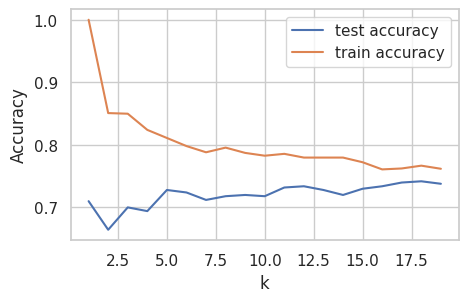

In [9]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df_cluster_ready, df['CustomerOccupation'], test_size=0.2, random_state=42, stratify=df['CustomerOccupation'])

# Determinar el mejor valor de k
k_values = range(1, 20)

# Precisión de los modelos
precisions_test = []
precisions_train = []

for k in k_values:
    modelo = KNeighborsClassifier(n_neighbors=k)
    modelo.fit(X_train, y_train)
    y_pred_test = modelo.predict(X_test)
    y_pred_train = modelo.predict(X_train)
    precisions_test.append(accuracy_score(y_test, y_pred_test))
    precisions_train.append(accuracy_score(y_train, y_pred_train))

# Visualizar la precisión en función de k
plt.figure(figsize=(5, 3))
plt.plot(k_values, precisions_test, label="test accuracy")
plt.plot(k_values, precisions_train, label="train accuracy")
plt.ylabel("Accuracy")
plt.xlabel("k")
plt.legend()
plt.show()

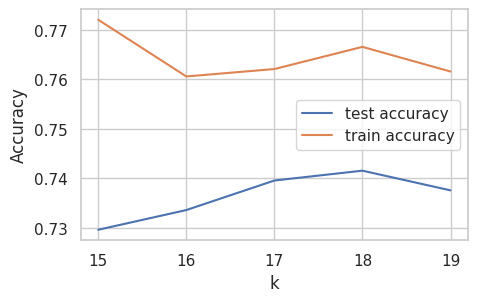

In [10]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df_cluster_ready, df['CustomerOccupation'], test_size=0.2, random_state=42, stratify=df['CustomerOccupation'])

# Determinar el mejor valor de k
k_values = range(15, 20)

# Precisión de los modelos
precisions_test = []
precisions_train = []

for k in k_values:
    modelo = KNeighborsClassifier(n_neighbors=k)
    modelo.fit(X_train, y_train)
    y_pred_test = modelo.predict(X_test)
    y_pred_train = modelo.predict(X_train)
    precisions_test.append(accuracy_score(y_test, y_pred_test))
    precisions_train.append(accuracy_score(y_train, y_pred_train))

# Visualizar la precisión en función de k
plt.figure(figsize=(5, 3))
plt.plot(k_values, precisions_test, label="test accuracy")
plt.plot(k_values, precisions_train, label="train accuracy")
plt.ylabel("Accuracy")
plt.xlabel("k")
plt.legend()
plt.show()

K= 18 es el punto donde visualmente el modelo parece generalizar


### <font color='264CC7'> Entrenamiento del modelo y evaluación </font>


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Entrena el modelo y evalúalo:
<ul>
  <li>Entrena el modelo con el valor de k seleccionado.</li>
  <li>Evalúa el modelo con el conjunto de datos de prueba.</li>
  <li>Genera una matriz de confusión y muestra las métricas de evaluación.</li>
</ul>
</div>

In [11]:
# Realizamos el agrupamiento
modelo = KNeighborsClassifier(n_neighbors=18)
modelo.fit(X_train, y_train)

# Realizar predicciones y evaluar el modelo
y_pred = modelo.predict(X_test)

# Precisión del modelo con dos decimales
accuracy = round(accuracy_score(y_test, y_pred), 2)
print("Precisión del modelo:", accuracy)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(cm)

# Reporte de clasificación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))


Precisión del modelo: 0.74
Matriz de confusión:
[[ 65  34  25   2]
 [ 15  81  17  12]
 [  1  16 103   0]
 [  1   7   0 124]]
Reporte de clasificación:
              precision    recall  f1-score   support

      Doctor       0.79      0.52      0.62       126
    Engineer       0.59      0.65      0.62       125
     Retired       0.71      0.86      0.78       120
     Student       0.90      0.94      0.92       132

    accuracy                           0.74       503
   macro avg       0.75      0.74      0.73       503
weighted avg       0.75      0.74      0.74       503



---
## <font color='264CC7'> Regresión </font>


### <font color='264CC7'> Preprocesamiento de datos </font>

### Carga de Datos

Primero necesitas el conjunto de datos. Los datos a utilzar son los seleccionados en la clase aterior.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Carga el conjunto de datos y procésalos:
<ul>
  <li>Muestra algunos datos.</li>
  <li>Muestra una descripción de los datos.</li>
  <li>Escala los datos si es necesario.</li>
</ul>
</div>

In [12]:
# Cargar el archivo
df = pd.read_csv("https://raw.githubusercontent.com/niconlvs/ModelosML/refs/heads/main/transacciones.csv")
df.head()

,TransactionAmount,TransactionType,Location,DeviceID,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionHour,TransactionWeekday,TransactionDay,TransactionMonth,PreviousTransactionDate
0,14.09,Debit,San Diego,D000380,M015,ATM,70,Doctor,81,1,5112.21,16,1,11,4,2024-11-04 08:08:08
1,376.24,Debit,Houston,D000051,M052,ATM,68,Doctor,141,1,13758.91,16,1,27,6,2024-11-04 08:09:35
2,126.29,Debit,Mesa,D000235,M009,Online,19,Student,56,1,1122.35,18,0,10,7,2024-11-04 08:07:04
3,184.50,Debit,Raleigh,D000187,M002,Online,26,Student,25,1,8569.06,16,4,5,5,2024-11-04 08:09:06
4,13.45,Credit,Atlanta,D000308,M091,Online,26,Student,198,1,7429.40,17,0,16,10,2024-11-04 08:06:39


### Descripción de los datos

In [13]:
print("🔹 Dimensión del DataFrame:", df.shape)

print("\n🔹 Valores Nulos por Columna:\n")
display(df.isnull().sum())

print("\n🔹 Estadísticos Descriptivos:\n")
display(df.describe())

🔹 Dimensión del DataFrame: (2512, 16)

🔹 Valores Nulos por Columna:



,0
TransactionAmount,0
TransactionType,0
Location,0
DeviceID,0
MerchantID,0
Channel,0
CustomerAge,0
CustomerOccupation,0
TransactionDuration,0
LoginAttempts,0



🔹 Estadísticos Descriptivos:



,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionHour,TransactionWeekday,TransactionDay,TransactionMonth
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.00000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966,16.626194,1.448248,15.827229,6.56250
std,291.946243,17.792198,69.963757,0.602662,3900.942499,0.731059,1.511310,8.761293,3.47559
min,0.260000,18.000000,10.000000,1.000000,101.250000,16.000000,0.000000,1.000000,1.00000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000,16.000000,0.000000,8.000000,3.00000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000,16.000000,1.000000,16.000000,7.00000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000,17.000000,3.000000,24.000000,10.00000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000,18.000000,4.000000,31.000000,12.00000


In [14]:
# Definir las columnas a usar
numeric_cols = [
    'TransactionAmount',
    'CustomerAge',
    'LoginAttempts',
    'AccountBalance',
    ]

cat_cols = [
    'TransactionType',
    'Channel',
    'CustomerOccupation'
    ]

### Gráficos

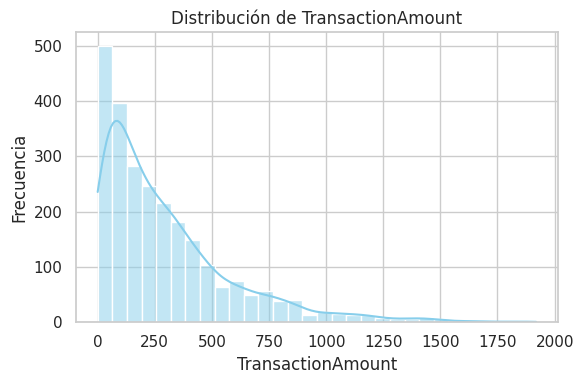

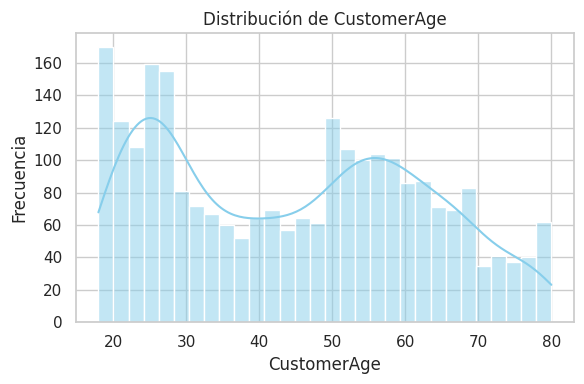

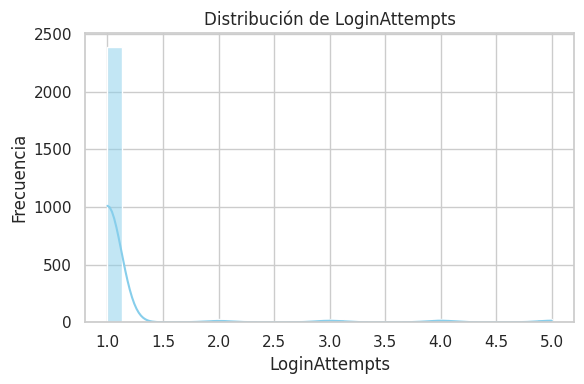

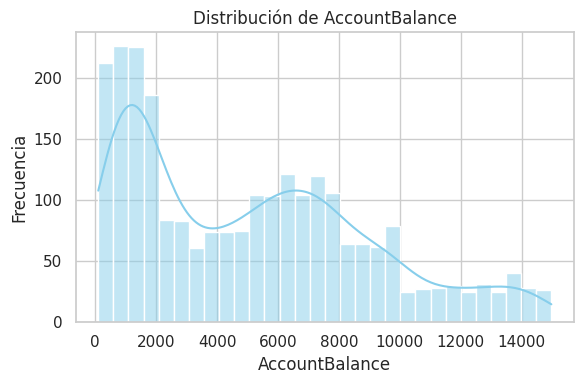

In [15]:
# Estilo bonito para los gráficos
sns.set(style="whitegrid")

# Crear un histograma para cada columna numérica
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.tight_layout()
    plt.show()

<ipython-input-16-5c6cfc839a8d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel', edgecolor='black')
<ipython-input-16-5c6cfc839a8d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel', edgecolor='black')
<ipython-input-16-5c6cfc839a8d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel', edgecolor='black')


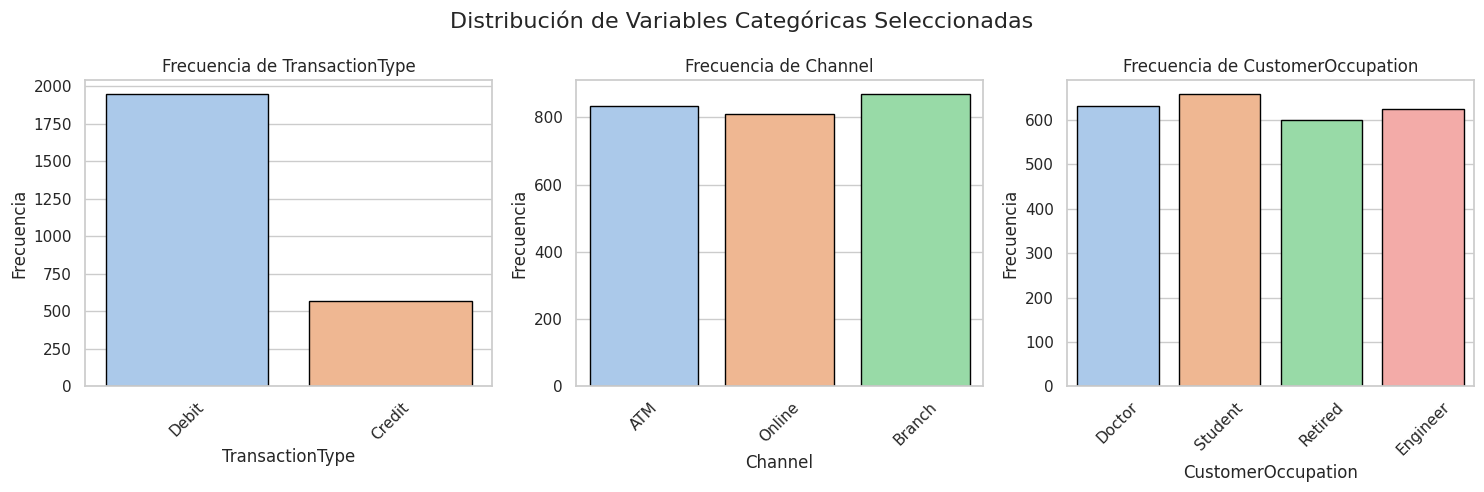

In [16]:
# Crear subplots
plt.figure(figsize=(15, 5))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(1, 3, i)
    sns.countplot(data=df, x=col, palette='pastel', edgecolor='black')
    plt.title(f"Frecuencia de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.xticks(rotation=45)

plt.suptitle("Distribución de Variables Categóricas Seleccionadas", fontsize=16)
plt.tight_layout()
plt.show()

### Escalar Datos

In [17]:
# Escalar columnas numéricas
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(df[numeric_cols])

# Codificar variables categóricas
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

X_cat_encoded = encoder.fit_transform(df[cat_cols])

# Crear nombres de columnas codificadas
encoded_cat_names = encoder.get_feature_names_out(cat_cols)
df_cat_encoded = pd.DataFrame(X_cat_encoded, columns=encoded_cat_names, index=df.index)

# Combinar numéricas escaladas + categóricas codificadas
X_final = np.hstack([X_num_scaled, X_cat_encoded])

# DataFrame final para explorar visualmente
df_cluster_ready = pd.DataFrame(X_final, columns=[*numeric_cols, *encoded_cat_names])


### <font color='264CC7'> Determinación del valor de k </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Determina el número óptimo de k para el algoritmo kNN:
<ul>
  <li>Genera una gráfica que muestre el valor de k vs la precisión del modelo.</li>
  <li>Selecciona el valor de k que maximice la precisión.</li>
</ul>
</div>


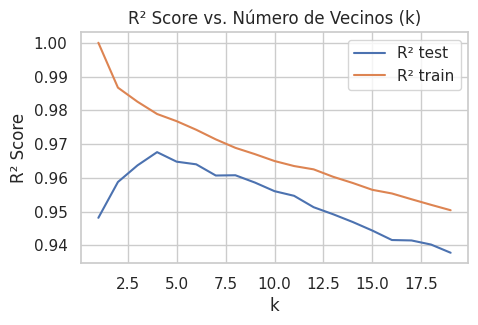

In [18]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df_cluster_ready, df['AccountBalance'], test_size=0.2, random_state=42)

# Determinar el mejor valor de k
k_values = range(1, 20)

# Precisión de los modelos
precisions_test = []
precisions_train = []

r2_test = []
r2_train = []

for k in k_values:
    modelo = KNeighborsRegressor(n_neighbors=k)
    modelo.fit(X_train, y_train)
    y_pred_test = modelo.predict(X_test)
    y_pred_train = modelo.predict(X_train)
    r2_test.append(r2_score(y_test, y_pred_test))
    r2_train.append(r2_score(y_train, y_pred_train))

# Visualizar el R² en función de k
plt.figure(figsize=(5, 3))
plt.plot(k_values, r2_test, label="R² test")
plt.plot(k_values, r2_train, label="R² train")
plt.ylabel("R² Score")
plt.xlabel("k")
plt.title("R² Score vs. Número de Vecinos (k)")
plt.legend()
plt.show()


En k=4 el modelo parece generalizar bien


### <font color='264CC7'> Entrenamiento del modelo y evaluación </font>


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Entrena el modelo y evalúalo:
<ul>
  <li>Entrena el modelo con el valor de k seleccionado.</li>
  <li>Evalúa el modelo con el conjunto de datos de prueba.</li>
  <li>Calcula el error cuadrático medio.</li>
</ul>
</div>

In [19]:

# Entrenar modelo
modelo = KNeighborsRegressor(n_neighbors=4)
modelo.fit(X_train, y_train)

# Predicción
y_pred = modelo.predict(X_test)

# Evaluación
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R² Score: {r2:.2f}")
print(f"MSE (Error Cuadrático Medio): {mse:.2f}")
print(f"MAE (Error Absoluto Medio): {mae:.2f}")

R² Score: 0.97
MSE (Error Cuadrático Medio): 478610.96
MAE (Error Absoluto Medio): 469.55


El R² de $0.97$ indica que el modelo generaliza muy bien